# **Customer Segmentation**

### **Problem Statement**


*   You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
data = pd.read_csv('Mall_Customers.csv')

## 1- Explore Data

In [13]:
# data.head()
# data.tail()
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
154,155,Female,47,78,16
75,76,Male,26,54,54
135,136,Female,29,73,88
109,110,Male,66,63,48
134,135,Male,20,73,5


In [14]:
data.shape # 200 row , 5 column

(200, 5)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## 2- Transform Object Data

In [18]:
la = LabelEncoder()
data['Gender'] = la.fit_transform(data['Gender']) # because when change gender to binary add the result in same coulmn without add new one

In [19]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 3- Creat Model

In [34]:
clustersn =[]
j = []

In [35]:
for i in range(1,12):
  model = KMeans(n_clusters=i)
  model.fit(data)
  clustersn.append(i)
  j.append(model.inertia_)

In [37]:
pd.DataFrame({'clusters':clustersn,'inertia':j})

,clusters,inertia
0,1,975512.060000
1,2,387065.713771
2,3,271396.562966
3,4,195401.198560
4,5,164544.957682
5,6,139181.020647
6,7,129420.591512
7,8,86004.025330
8,9,77552.775763
9,10,69875.991376


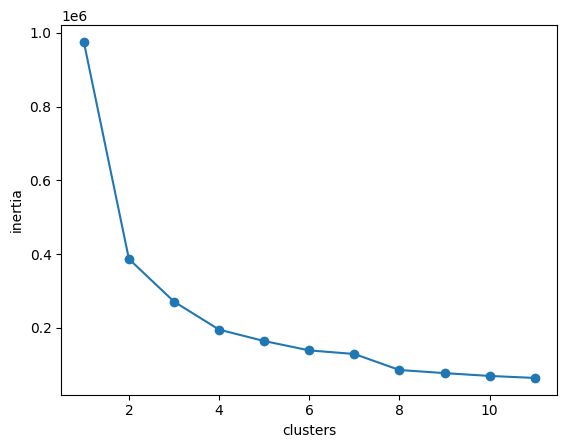

In [40]:
plt.plot(clustersn,j,marker='o')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()  # 4 is the best

In [43]:
model = KMeans(n_clusters=4)
model.fit(data)
pre = model.predict(data)

In [44]:
data['k-mean']= pre

In [45]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k-mean
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,2
197,198,1,32,126,74,0
198,199,1,32,137,18,2


In [46]:
df1=data[data['k-mean']==0]
df2=data[data['k-mean']==1]
df3=data[data['k-mean']==2]
df4=data[data['k-mean']==3]

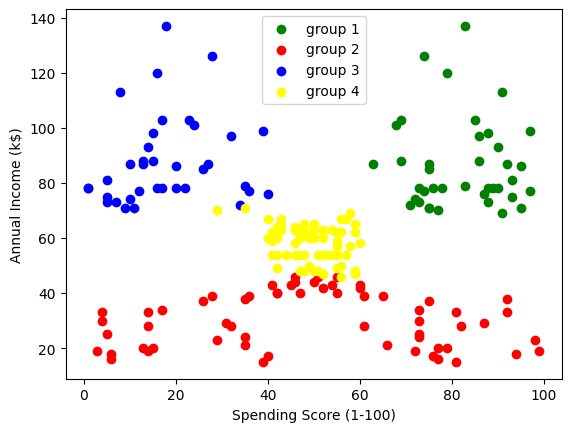

In [58]:
plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],c='green', label = 'group 1')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],c='red', label = 'group 2')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],c='blue',label = 'group 3')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],c='yellow',label = 'group 4')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()


## 4- Data Analysis

<Axes: xlabel='k-mean', ylabel='count'>

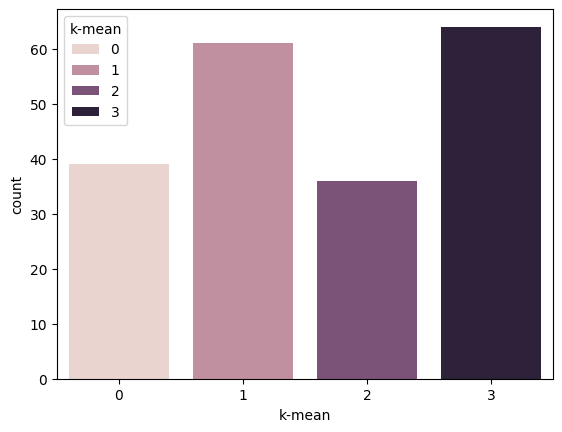

In [63]:
sns.countplot(data=data,x='k-mean',hue='k-mean')

<Axes: ylabel='count'>

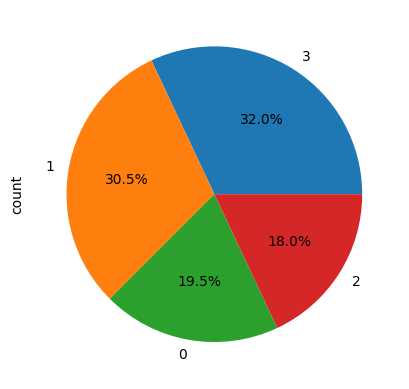

In [72]:
data['k-mean'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='k-mean', ylabel='Spending Score (1-100)'>

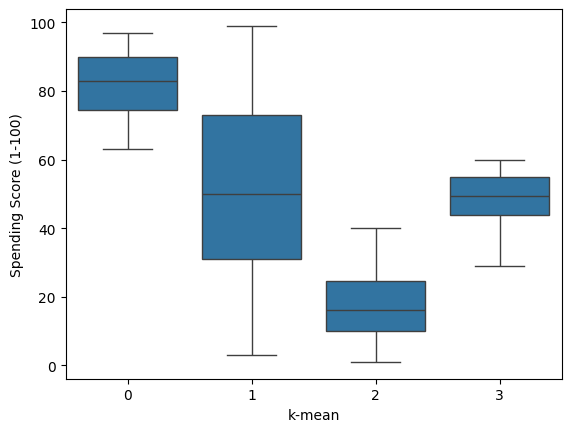

In [75]:
sns.boxplot(data=data,x='k-mean',y='Spending Score (1-100)')

<Axes: xlabel='Age', ylabel='Count'>

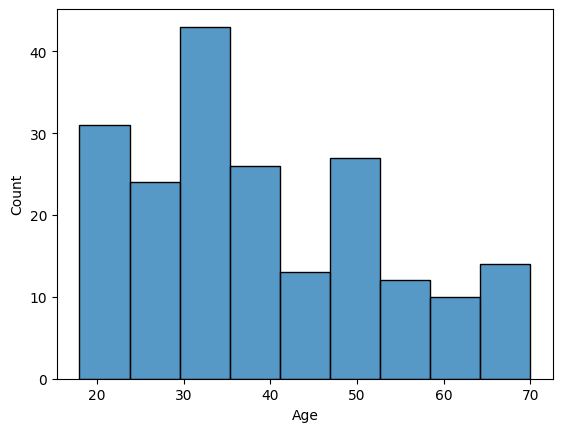

In [77]:
sns.histplot(data.Age)

<Axes: xlabel='Gender', ylabel='count'>

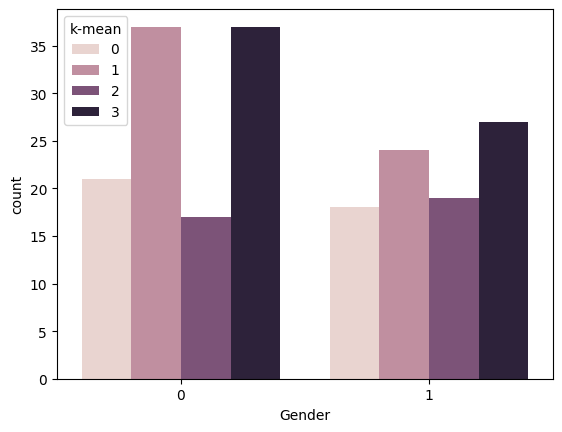

In [85]:
sns.countplot(data=data,x='Gender',hue='k-mean')